# Map example plot (interactive)



In [14]:
# get the package support to make http requests 
import urllib3
import json
http = urllib3.PoolManager()

r = http.request('GET', "http://api.open-notify.org/iss-now.json")
# returns a dictionary 
result=json.loads(r.data.decode('utf-8'))
iss=result['iss_position'] # key is iss_position, and the value itself is a dictionary


print ("latest long and latitude position of the ISS: "+iss['longitude']+' '+iss['latitude'])

latest long and latitude position of the ISS: 155.0550 -51.4068


In [2]:
## next we use matplotlib to make a plot of the globe with the ISS position on top

In [10]:
%matplotlib inline

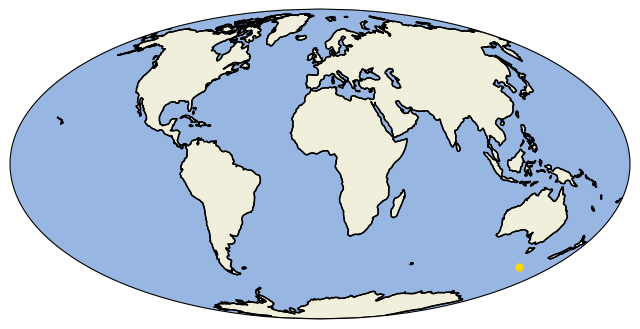

In [15]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.crs as ccrs

data_crs = ccrs.PlateCarree()
lon=float(iss['longitude'])
lat=float(iss['latitude'])

fig = plt.figure(figsize=(8, 12))
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines(resolution='110m')
#ax.gridlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.plot(lon,lat,"o",markersize=5,color='gold',transform=data_crs)
ax.set_global()
#ax.gridlines()
plt.show()

In [5]:
%matplotlib notebook
# set variable True if it works the notebook plotting method
# else this may not produce the animated plot in Jupyterlab
DOES_WORK = False
if DOES_WORK:
    # here a simple endless animation
    # get the package support to make http requests 
    import urllib3
    import json
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    import cartopy
    import cartopy.crs as ccrs
    
    import time
    
    def get_iss():
        http = urllib3.PoolManager()
        r = http.request('GET', "http://api.open-notify.org/iss-now.json")
        # returns a dictionary 
        result=json.loads(r.data.decode('utf-8'))
        return result['iss_position'] # key is iss_position, and the value itself is a dictionary
    
        
    
    fig = plt.figure(figsize=(8, 12))
    plt.ion() # ??? 
    
    fig.canvas.draw()
    data_crs = ccrs.PlateCarree()
    ax = plt.axes(projection=ccrs.Mollweide())
    fig.show()
    i=0
    while True:
        i=0
        iss=get_iss()
        lon=float(iss['longitude'])
        lat=float(iss['latitude'])
        #print ("latest long and latitude position of the ISS: "+iss['longitude']+' '+iss['latitude'])
        # make the plot
        ax.clear()
        #ax = plt.axes(projection=ccrs.Mollweide())
        ax.coastlines(resolution='110m')
        ax.gridlines()
        ax.add_feature(cartopy.feature.OCEAN, zorder=0)
        ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
        ax.plot(lon,lat,"o",markersize=5,color='gold',transform=data_crs)
        ax.text(lon,lat,str(lon)+" "+str(lat),size=14,color='black',transform=data_crs)
        #ax.set_global()
        ax.set_extent([lon-20,lon+20, lat-20, lat+20])
        ax.gridlines(color='white')
        fig.canvas.draw()
        time.sleep(1)
        i=i+1
else:
    print ("Animated plotting currently not supported")




Animated plotting currently not supported


In [6]:
%matplotlib notebook
# set variable True if it works the notebook plotting method
# else this may not produce the animated plot in Jupyterlab
DOES_WORK = False
if DOES_WORK:
    # here a simple endless animation
    # get the package support to make http requests 
    import urllib3
    import json
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    import cartopy
    import cartopy.crs as ccrs
    
    import time
    
    def get_iss():
        http = urllib3.PoolManager()
        r = http.request('GET', "http://api.open-notify.org/iss-now.json")
        # returns a dictionary 
        result=json.loads(r.data.decode('utf-8'))
        return result['iss_position'] # key is iss_position, and the value itself is a dictionary
    
        
    
    fig = plt.figure(figsize=(8, 12))
    plt.ion() # ??? 
    
    fig.canvas.draw()
    data_crs = ccrs.PlateCarree()
    ax = plt.axes(projection=ccrs.Mollweide())
    fig.show()
    i=0
    # keep track of all
    lon,lat =[], []
    while True:
        iss=get_iss()
        if len(lon)<6:
            lon.append(float(iss['longitude']))
            lat.append(float(iss['latitude']))
        else:
            lon.pop(0) # drop the first element
            lat.pop(0) # drop the first element
        # make the plot
        ax.clear()
        #ax = plt.axes(projection=ccrs.Mollweide())
        ax.coastlines(resolution='110m')
        ax.gridlines()
        ax.add_feature(cartopy.feature.OCEAN,zorder=0)
        ax.add_feature(cartopy.feature.LAND,zorder=0, edgecolor='black')
        i=0
        while i<len(lon):
            transparency=i/len(lon) # older point locations get more transparent
            ax.plot(lon,lat,"+",markersize=5,color='gold',transform=data_crs)
            i=i+1
        #ax.text(lon,lat,str(lon)+" "+str(lat),size=14,color='black',transform=data_crs)
        ax.set_global()
        ax.gridlines(color='white')
        fig.canvas.draw()
        time.sleep(10)
        i=i+1
else:
    print ("Animated plotting currently not supported")


Animated plotting currently not supported


---
### References:
* [Cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html)
   * [Map projection list](http:/scitools.org.uk/cartopy/docs/latest/index.html)
   * [Important for map projections](http://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html)
* Example for animated plots on [stack overflow](https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook/39853938)


* [ISS live stream (not active any more?)](http://www.ustream.tv/channel/live-iss-stream)